In [1]:
import pandas as pd
df = pd.read_csv('cardio_train.csv', sep=';')
df = df.iloc[:, 1:]
print(df.isnull().any())
df.info()
df.columns
df

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory us

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


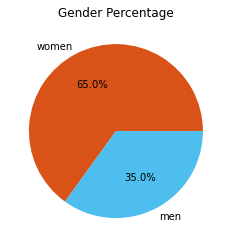

In [2]:
import matplotlib.pyplot as plt
temp = df.groupby('gender').size().rename(index={1:'women',2:'men'})
temp.plot(kind='pie',autopct='%.1f%%',colors=['#D95319','#4DBEEE'],title='Gender Percentage').set_ylabel('')
plt.savefig('gender_percentage.jpg')

In [3]:
print("max value: \n", df[['age','height','weight','ap_hi','ap_lo']].max())
print("min value: \n", df[['age','height','weight','ap_hi','ap_lo']].min())
print("average value: \n", df[['age','height','weight','ap_hi','ap_lo']].mean())

max value: 
 age       23713.0
height      250.0
weight      200.0
ap_hi     16020.0
ap_lo     11000.0
dtype: float64
min value: 
 age       10798.0
height       55.0
weight       10.0
ap_hi      -150.0
ap_lo       -70.0
dtype: float64
average value: 
 age       19468.865814
height      164.359229
weight       74.205690
ap_hi       128.817286
ap_lo        96.630414
dtype: float64


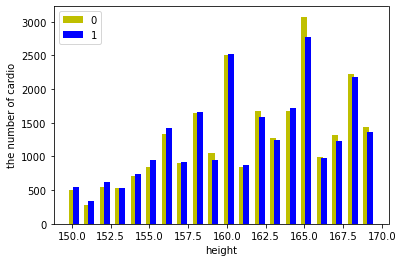

In [4]:

# temp = pd.cut(df['height'],bins=[30, 120, 130, 140, 150, 160,170],
#                      right=False, labels=['30-120', '120-130', '130-140', '140-150', '150-160', 'above 160'])
# print('wide_count:')
# print(pd.value_counts(temp))
# df[df['height']>=150].groupby('height').plot(kind="bar",x='height')
tempdf = df[['height', 'cardio']]
df1 = pd.DataFrame(data=None)
list1 = list()
list2 = list()
height = list()
height2 = list()
for i in range(150, 170):
    temp = tempdf[tempdf['height']==i].groupby('cardio').size()
    height.append(i)
    height2.append(i+0.25)
    list1.append(temp[0])
    list2.append(temp[1])

plt.bar(height, list1, color='y', width = 0.4,label='0')
plt.bar(height2, list2, color='b', width = 0.4,label='1')
plt.legend(loc='upper left')
plt.xlabel('height')
plt.ylabel('the number of cardio')
plt.savefig('height&cardio.jpg')
plt.show()

In [5]:
temp = pd.cut(df['age'],bins=[10000,18000, 20000, 22000, 24000],
                     right=False, labels=['a', 'b', 'c', 'd',])
print('wide_count:')
print(pd.value_counts(temp))

wide_count:
b    20490
c    20011
a    18186
d    11313
Name: age, dtype: int64


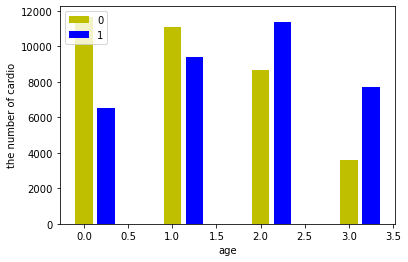

In [6]:
tempdf = df[['age', 'cardio']]
df1 = pd.DataFrame(data=None)
list1 = list()
list2 = list()
height = list()
height2 = list()
bas = [10000,18000, 20000, 22000, 24000]
for i in range(4):
    temp = tempdf[((tempdf['age']>=bas[i]) & (tempdf['age']<bas[i+1]))].groupby('cardio').size()
    height.append(i)
    height2.append(i+0.25)
    list1.append(temp[0])
    list2.append(temp[1])

plt.bar(height, list1, color='y', width = 0.2,label='0')
plt.bar(height2, list2, color='b', width = 0.2,label='1')
plt.legend(loc='upper left')
plt.xlabel('age')
plt.ylabel('the number of cardio')
plt.savefig('age&cardio.jpg')
plt.show()

['/Users/kaijingzhang', '/opt/anaconda3/lib/python38.zip', '/opt/anaconda3/lib/python3.8', '/opt/anaconda3/lib/python3.8/lib-dynload', '', '/opt/anaconda3/lib/python3.8/site-packages', '/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/kaijingzhang/.ipython']


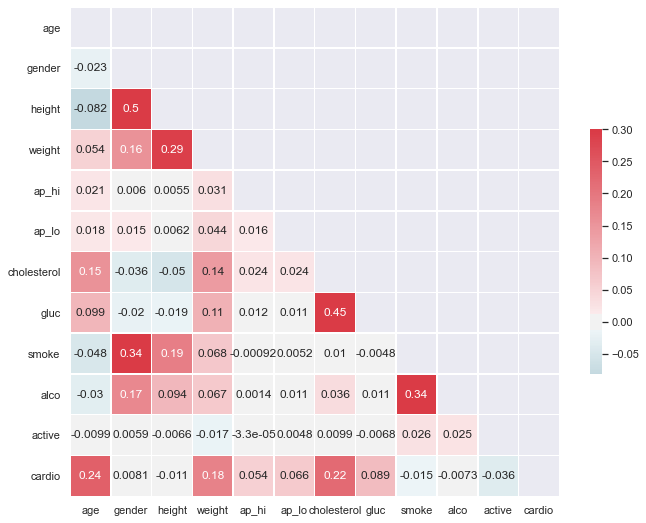

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.path)
sys.path.append('<path to package in your syste>')
import seaborn as sns
sns.set()
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
print(df.corr()['cardio'].sort_values(ascending=False))
df.corr().iloc[-1:]

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
cardio,0.238159,0.008109,-0.010821,0.18166,0.054475,0.065719,0.221147,0.089307,-0.015486,-0.00733,-0.035653,1.0


<function matplotlib.pyplot.show(*args, **kw)>

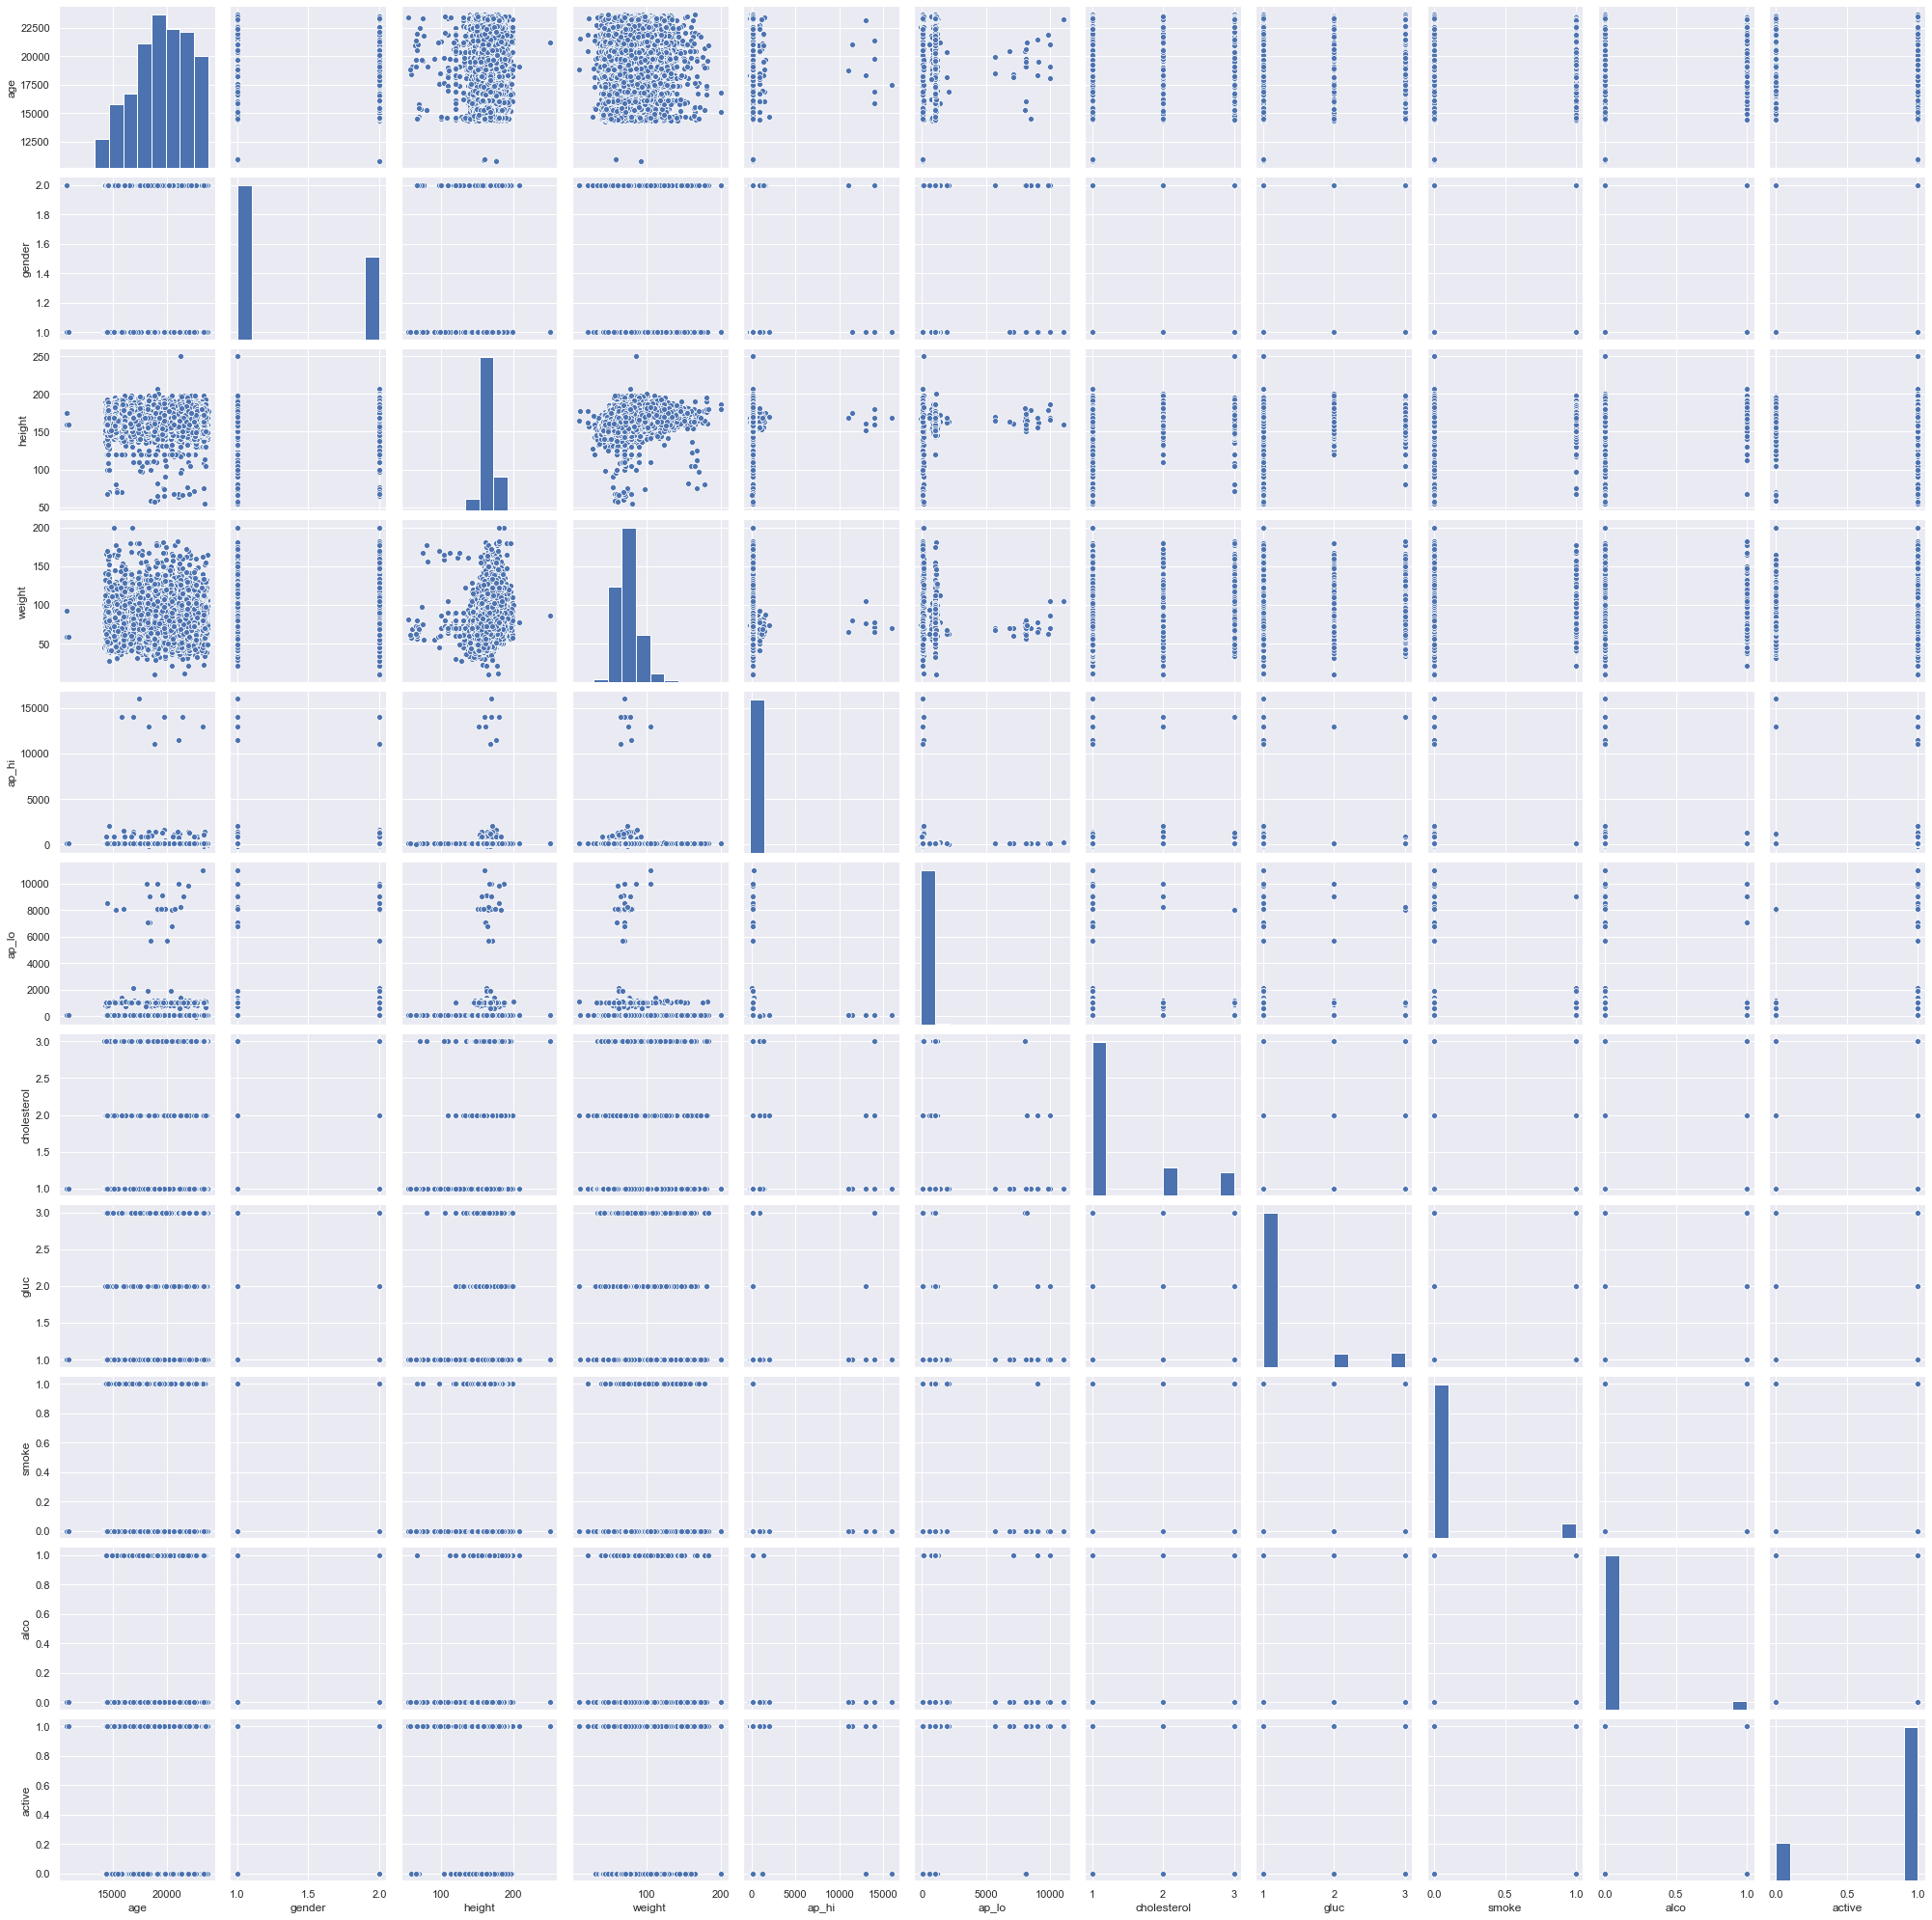

In [9]:
cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active']

sns.pairplot(df[cols], height = 2.5)

plt.show

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # Import train_test_split function

X=df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y=df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

X_importance=clf.feature_importances_
print(X_importance)

y_pred=clf.predict(X_test)
# print(len(y_pred))
# print(len(y_test.values.tolist()))
print(accuracy_score(y_test, clf.predict(X_test)))


[0.30645981 0.01499886 0.15644607 0.17410784 0.16562252 0.09629901
 0.03910711 0.01716102 0.00879849 0.00752666 0.01347261]
0.716952380952381


In [11]:
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# X=df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
#        'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
# y=df['cardio']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# # Create Decision Tree classifer object
# clf = DecisionTreeClassifier()

# # Train Decision Tree Classifer
# clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [12]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from six import StringIO
# from IPython.display import Image  
# import pydotplus

# feature_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
#        'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('dt.png')
# Image(graph.create_png())

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
# import pydotplus
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7275238095238096


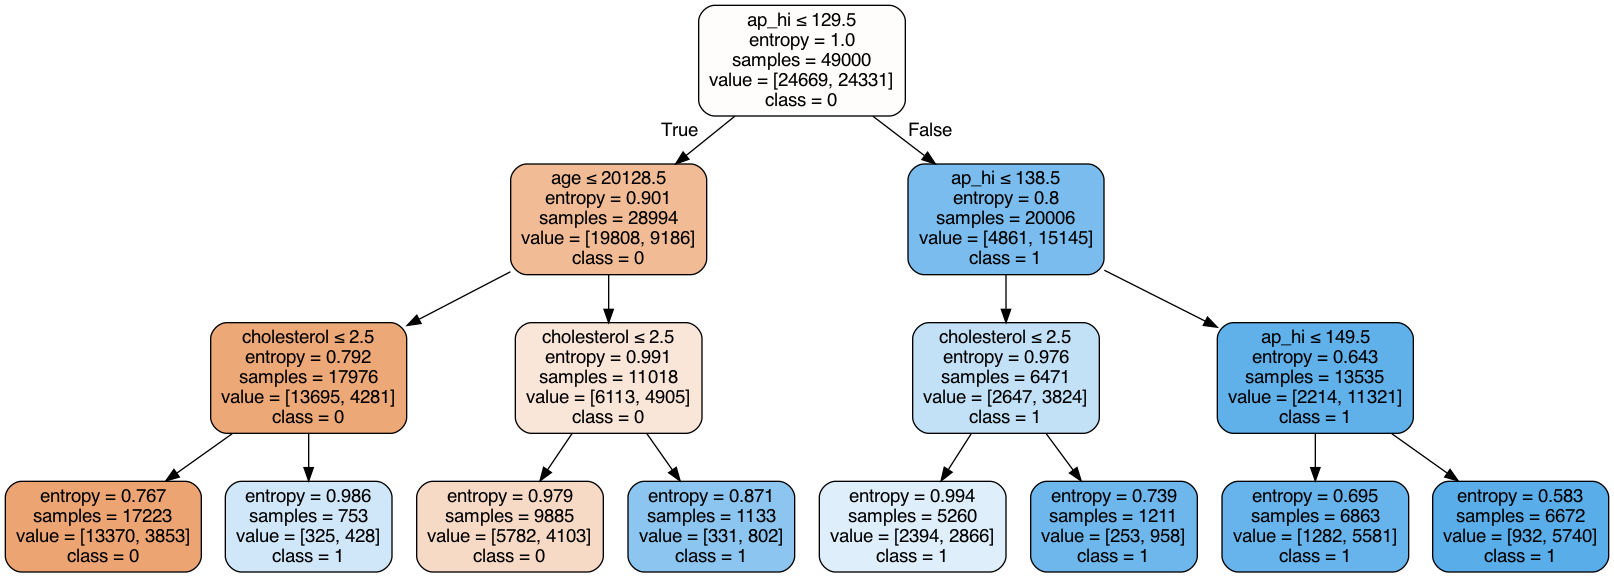

In [28]:
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
feature_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())